# Bayes ratios

In [8]:
import json 

def get_evidence(path):


    # Opening JSON file
    f = open(path)

    # returns JSON object as 
    # a dictionary
    data = json.load(f)


    return data["log_evidence"]




def parse_filename(f):
    

    return float(f.split('_')[12]) #this is the h value


def bayes_factor(f1,f2):


    evidence1 = get_evidence(f1)
    evidence2 = get_evidence(f2)

    print(f1, evidence1)
    print(f2, evidence2)
    return evidence1-evidence2


In [9]:
import glob 
root = '/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/'

list_of_model_files = sorted(glob.glob(root + "*earth*.json"))
list_of_null_files = sorted(glob.glob(root + "*null*.json"))

In [10]:

import numpy as np 
N = len(list_of_model_files)

strains = np.zeros(N)
bayes_factors = np.zeros(N) 
for i in range(N):
    print(i)
    assert parse_filename(list_of_model_files[i]),parse_filename(list_of_null_files[i]) #check h of each file is the same

    strains[i] = parse_filename(list_of_model_files[i])
    bayes_factors[i] =  bayes_factor(list_of_model_files[i],list_of_null_files[i])
 



0
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/paper_bayes_ratios_n1000_h_1.0232929922807536e-13_model_earth_seed_1237_result.json 574181.1897582179
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/paper_bayes_ratios_n1000_h_1.0232929922807536e-13_model_null_seed_1237_result.json 554431.2832194725
1
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/paper_bayes_ratios_n1000_h_1.0471285480508985e-14_model_earth_seed_1237_result.json 585620.2801797417
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/paper_bayes_ratios_n1000_h_1.0471285480508985e-14_model_null_seed_1237_result.json 585415.9155644276
2
/Users/t1/github_repos/StateSpacePTA/data/nested_sampling/data_for_manuscript/paper_bayes_ratio_n1000/paper_bayes_ratios_n1000_h_1.071519305237605e-15_model_earth_seed_1237_result.

In [11]:
#sort in order of strain
p = strains.argsort()
x = strains[p]
y = bayes_factors[p]

In [12]:
#Save output as np array
data_output = np.zeros((len(x),2))
data_output[:,0] = x 
data_output[:,1] = y
np.save("../data/PaperBayesFilen1000",data_output)

In [3]:
import numpy as np 
data = np.load("../data/PaperBayesFilen1000.npy") 
x = data[:,0]
y = data[:,1]

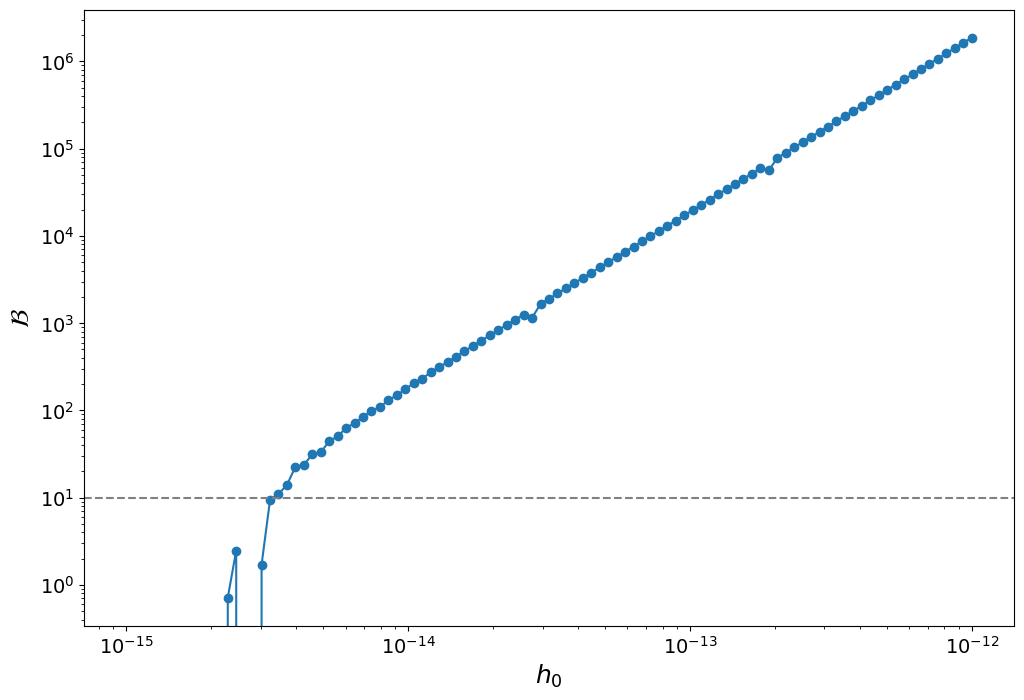

In [4]:
import matplotlib.pyplot as plt 
import scienceplots


h,w = 12,8
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))


ax.scatter(x,y)
ax.plot(x,y)






ax.set_xscale('log')
ax.set_yscale('log')



fs=18
ax.set_xlabel(r'$h_0$', fontsize=fs)
ax.set_ylabel(r'$\mathcal{B}$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)

ax.axhline(10,linestyle='--', c='0.5')

plt.savefig(f"../data/images/PaperBayesRatioPlotn1000_stacked.png", bbox_inches="tight",dpi=300)


In [6]:
y 

array([-1.57272722e+00, -1.66959166e+00, -1.51947303e+00, -1.53987634e+00,
       -6.66188478e-01, -1.34416955e+00, -1.44127524e+00, -1.52662176e+00,
       -1.58671790e+00, -4.65672652e-01, -4.57427814e-01, -1.59973868e+00,
        7.15187858e-01,  2.47899592e+00, -9.99219371e-02, -1.56919701e+00,
        1.71028907e+00,  9.42310472e+00,  1.10329645e+01,  1.39714016e+01,
        2.26001938e+01,  2.38460609e+01,  3.12871216e+01,  3.31144457e+01,
        4.43417359e+01,  5.03176459e+01,  6.31927224e+01,  7.13003017e+01,
        8.49986146e+01,  9.87672892e+01,  1.08542113e+02,  1.31835727e+02,
        1.48533395e+02,  1.76439452e+02,  2.04364615e+02,  2.31338594e+02,
        2.72584202e+02,  3.16292285e+02,  3.55892622e+02,  4.13527391e+02,
        4.76973562e+02,  5.50483969e+02,  6.30864606e+02,  7.26070112e+02,
        8.32924303e+02,  9.55820317e+02,  1.10104333e+03,  1.25664736e+03,
        1.15632230e+03,  1.66100474e+03,  1.90680617e+03,  2.18817996e+03,
        2.50877625e+03,  

In [12]:
#Get the minimal detectable strain 


import numpy as np 
xlog = x
ylog=y



ynew = 10.0 
xnew = np.interp(ynew, ylog, xlog)





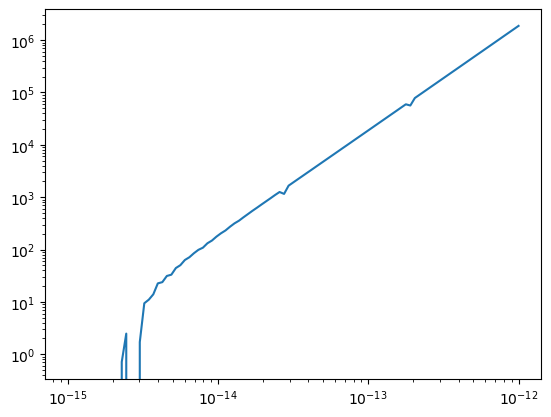

In [16]:
plt.plot(xlog,ylog)
plt.yscale('log')
plt.xscale('log')

In [14]:
xnew 

3.31887049725634e-15